# **Project**

In [7]:
# Import the modules from skimage
from skimage import data, color
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure
from skimage.transform import rotate, rescale
from skimage.transform import resize
from skimage import morphology
import matplotlib.patches as patches # create a red rectangle
from skimage.feature import Cascade # face detection

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
# định nghĩa cái mask(mask = get_mask) là 1 tham số trong module nào đó
def get_mask(image):
  ''' Creates mask with three defect regions '''
  mask = np.zeros(image.shape[:-1])
  mask[101:106, 0:240] = 1
  mask[152:154, 0:60] = 1
  mask[153:155, 60:100] = 1
  mask[154:156, 100:120] = 1
  mask[155:156, 120:140] = 1
  mask[212:217, 0:150] = 1
  mask[217:222, 150:256] = 1
  return mask

# Function to show image with contours(đường nét)
def show_image_contour(image, contours):
    plt.figure()
    plt.title("Sau khi tìm hàm bao")
    plt.imshow(image, cmap='gray')
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.show()

# show corner
def show_image_with_corners(image, coords, title="Corners detected"):
  plt.imshow(image, interpolation='nearest'
  , cmap='gray')
  plt.title(title)
  plt.plot(coords[:, 1], coords[:, 0],
  '+r'
  , markersize=15)
  plt.axis('off')
  plt.show()

 # create a red rectangle
def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result, cmap='gray')
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch(patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False, color='r', linewidth=2))
    plt.show()



# Privacy protection
Let's look at a real-world application of what you have learned in the course.

In this exercise, you will detect human faces in the image and for the sake of privacy, you will anonymize data by blurring people's faces in the image automatically.

In [8]:
def mergeBlurryFace(original, gaussian_image, d):
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    original[x:width, y:height] = gaussian_image
    return original

In [9]:
# Detect the faces

group_image = plt.imread("face_det25.jpg")

from skimage.filters import gaussian

# Detect the faces
detected = detector.detect_multi_scale(img=group_image,
                                       scale_factor=1.2, step_ratio=1,
                                       min_size=(10,10), max_size=(100, 100))

# For each detected face
for d in detected:
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)

    # Apply gaussian filter to extracted face(tùy chỉnh sigma độ mờ)
    blurred_face = gaussian(face, multichannel=True, sigma = 8)


    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)

show_image(resulting_image, "Blurred faces")


NameError: ignored

<ipython-input-11-c4dde3e90a83>:11: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  upright_img_without_noise = denoise_tv_chambolle(upright_img, weight=0.1, multichannel=True)
<ipython-input-11-c4dde3e90a83>:15: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)


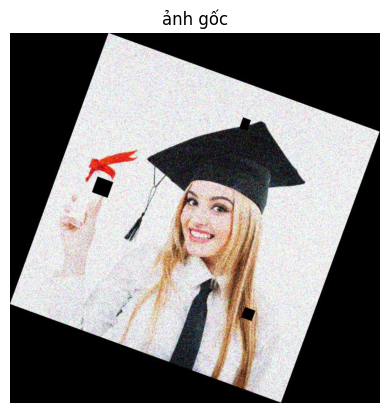

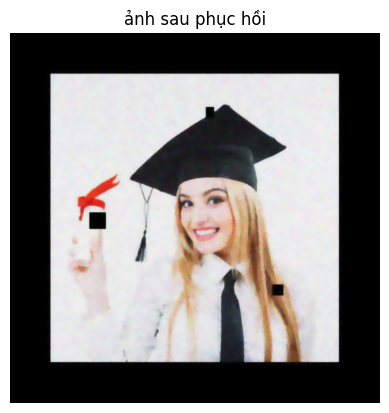

In [11]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage.transform import rotate

damaged_image = plt.imread("sally_damaged_image.jpg")

# Transform the image so it's not rotated
upright_img = rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img, weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

show_image(damaged_image, "ảnh gốc")
show_image(result, "ảnh sau phục hồi")
